(([], []), ([], []))

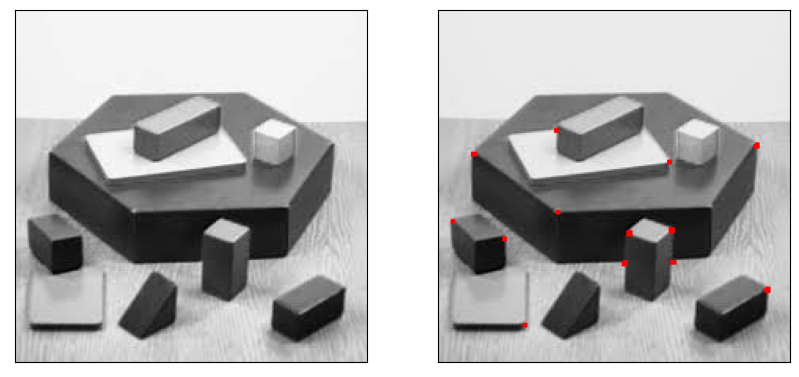

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('box.jpg', cv.IMREAD_GRAYSCALE)

scores = cv.cornerHarris(img, 2, 3, 0.04)

th = 0.30 * scores.max()

scores = cv.dilate(scores, None)

mask = scores > th

res = img.copy()
res = cv.cvtColor(res, cv.COLOR_GRAY2BGR)
res[mask] = [255,0,0]

plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2), plt.imshow(res, cmap='gray')
plt.xticks([]), plt.yticks([])


In [2]:
mask[mask] = 255
mask = np.uint8(mask)

ret, labels, stats, centroids = cv.connectedComponentsWithStats(mask)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)

corners = cv.cornerSubPix(img, np.float32(centroids), (5,5), (-1,-1), criteria)

print(corners)

[[111.98768   111.92726  ]
 [ 75.45067    74.43227  ]
 [202.94571    84.8634   ]
 [ 21.46168    90.73309  ]
 [147.67157    96.801186 ]
 [ 74.7132    129.63623  ]
 [  7.6209493 133.55072  ]
 [149.11728   139.1986   ]
 [119.663     141.94115  ]
 [ 42.        146.       ]
 [118.76728   160.40099  ]
 [148.76256   159.37204  ]
 [210.30846   177.14206  ]
 [ 56.210617  200.65617  ]]
